# P3 - Using cartopy for mapping




Setting up packages and requirements

In [8]:
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import numpy as np
from geopy.geocoders import Nominatim
from geopy.distance import geodesic

**Building map 1**

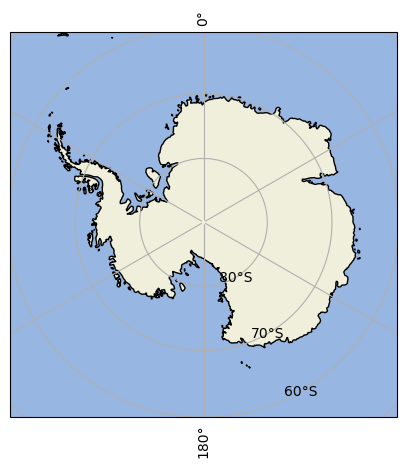

In [95]:
proj = ccrs.SouthPolarStereo()
             
plt.figure(figsize =[10, 5])
ax = plt.axes(projection=proj)
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.coastlines(resolution='50m', color='black', linewidth=1)
ax.gridlines(draw_labels=True)

Map 1: Showcasing the Antarctic continent as well as the Southern ocean around it. Due to it's location at the pole, many projections fail to accurately visualize the map, I decided to use a projection specifically designed to handle this area for that reason (SouthPolarStereo).

**Building map 2**

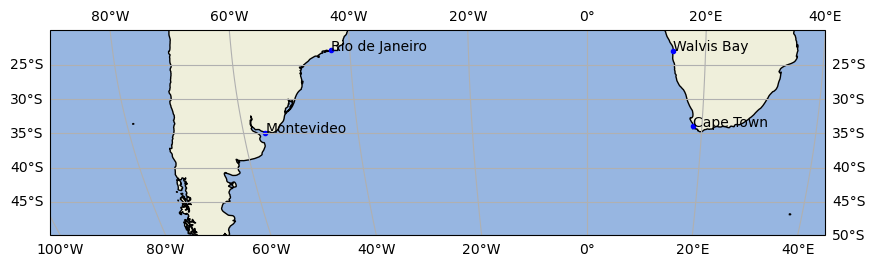

In [97]:
geolocator = Nominatim(user_agent='educational')
place = ['Cape Town','Walvis Bay','Rio de Janeiro','Montevideo']
address = []
for p in place:
    loc = geolocator.geocode(p,language="en")
    address.append(loc)


plt.figure(figsize =[10, 5])
ax = plt.axes(projection=ccrs.Robinson())
ax.set_extent([-90, 40, -50, -20], ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.coastlines(resolution='50m', color='black', linewidth=1)
ax.gridlines(draw_labels=True)
ax.plot(-117.1625, 32.715, 'bo', markersize=7, transform=ccrs.Geodetic())
for p in range(len(place)):
    ax.text(address[p].longitude,address[p].latitude,place[p],transform=ccrs.Geodetic())
    ax.plot(address[p].longitude , address[p].latitude, 'bo', markersize=3, transform=ccrs.Geodetic())
    

Map 2: Could of used either Robinson or PlateCarree projection, since the objective is to see the Atlantic ocean and whereabouts of the cities, I decided to choose a projection that created a straightfoward and simple-to-compare map.|

**Building map 3**

-Decided to keep ocean and land features as a backdrop to directly compare the resolutions

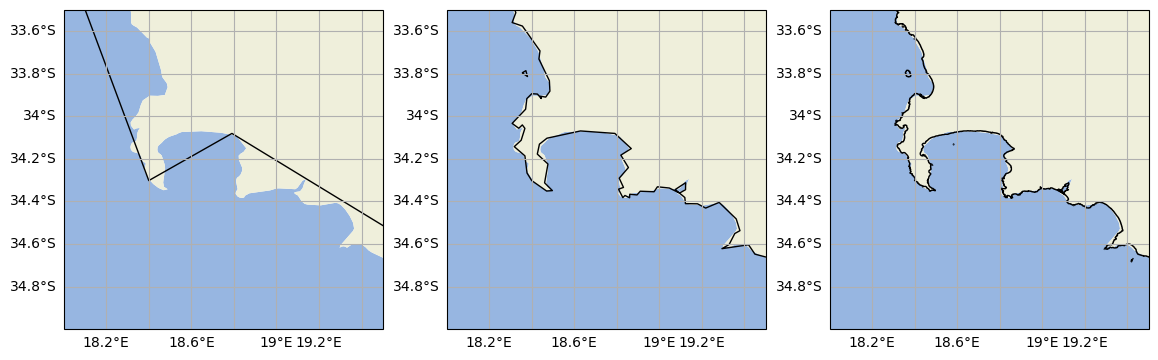

In [94]:
extent = [18, 19.5, -33.5, -35]
cl_crude = cfeature.GSHHSFeature(scale='c')
cl_int = cfeature.GSHHSFeature(scale='i')
cl_full = cfeature.GSHHSFeature(scale='f')


fig,ax = plt.subplots(1,3,figsize=(14,6),subplot_kw={'projection':ccrs.PlateCarree()})
ax[0].set_extent(extent)
gl0 = ax[0].gridlines(draw_labels=True)
#ax[0].coastlines(resolution='50m')
ax[1].set_extent(extent)
gl1 = ax[1].gridlines(draw_labels=True)
ax[2].set_extent(extent)
gl2 = ax[2].gridlines(draw_labels=True)
#ax[1].coastlines(resolution='10m')
ax[0].add_feature(cl_crude)
ax[1].add_feature(cl_int)
ax[2].add_feature(cl_full)
ax[0].add_feature(cfeature.OCEAN)
ax[0].add_feature(cfeature.LAND)
ax[1].add_feature(cfeature.OCEAN)
ax[1].add_feature(cfeature.LAND)
ax[2].add_feature(cfeature.OCEAN)
ax[2].add_feature(cfeature.LAND)

gl0.right_labels = False
gl0.top_labels = False
gl1.right_labels = False
gl1.top_labels = False
gl2.right_labels = False
gl2.top_labels = False


Map 3: With such a small extent, and a focus on coastlines/resolutions, I once again decided to go with the straightforward option of a PlateCarree projection